### 6. Linear Regression with PyTorch
#### 1. About Linear Regression
##### 1.1 Simple Linear Regression Basics
- Allows us to <b> understand relationship between two continuous variables </b>
- Example
    - x: independent variable <- when X changes it affects Y (when a,b are constant)
        - weigth
    - y: dependent variable
        - height
    - $ y = \alpha x + \beta $

##### 1.2 Example of simple linear regression

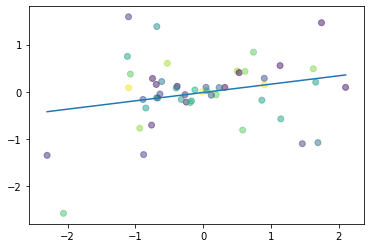

In [2]:
# Modeling behaviour between x y
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1) # seed
n = 50 # number of points
x = np.random.randn(n) # x variable
y = x * np.random.randn(n) # y variable

# We try to make there a line that will fit the so much points as it is possible

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

##### 1.3 Aim of Linear Regression
- Minimize thedistance between the pointsandthe line $ y = \alpha x + \beta $
- Adjusting 
    - Coefficient: $ \alpha $ <- changes orientation of the line
    - Bias/Intercept: $ \beta $ <- moves the line up or down

#### 2. Building a Linear Regression Model with PyTorch
##### 2.1 Example
- Coefficient: $ \alpha = 1 $ , when alfa is large number then the line is very steep, or when it is close to 0 it is similar to straight line
- Bias/Intercept: $ \beta = 1 $
- Equation: $ y = 2x + 1 $
    
    

##### 2.2 Building a Toy Dataset

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Convert tonumpy
x_train = np.array(x_values, dtype=np.float32) # only 1-d 
x_train.shape
print(x_train)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [4]:
# IMPORTANT: 2drequired
x_train = x_train.reshape(-1,1)
x_train.shape
print(x_train)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


$ y = 2x +1 $

In [5]:
y_values = [2*i + 1 for i in x_values] # building relationship for y
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [6]:
# In case you're weak in list iterators
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)

In [7]:
y_train = np.array(y_values, dtype=np.float32) # again convert to NumPy
y_train.shape
print(y_train)

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]


In [8]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape
print(y_train)

[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


#### 2.3 Building Model
##### Critical imports

In [9]:
import torch
import torch.nn as nn # require for linear regression model
from torch.autograd import Variable

##### Create Model

We want to model this relationship given a particular x dataset
1. Linear Model
    - True Equation: y = 2x + 1
2. Forward
    - Example
        - Input x = 1
        - Output y = ? 

In [10]:
# Create model class
class LinearRegressionModel(nn.Module): # passing nn.Module <- always when define modul
    def __init__(self, input_size, output_size): 
        super(LinearRegressionModel, self).__init__() # super () <- inherits from nn.Module and allows 
        # you to use verything from nn.Module
        self.linear = nn.Linear(input_dim, output_dim) # input dim = x, output dim = y
    
    def forward(self,x): #  x -values of x
        out = self.linear(x) # self.linear, we call this function for each value of x
        return out

##### Instantiate Model Class
    - input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    - desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [11]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

### Instantiate Loss Class
- How we want to minimize the distance between the predicted values and true values
- MSE Loss: Mean Squared Error 
- MSE = $ \frac{1}{n} \sum_{i = 1}^{n} (\hat{y}_{i} - y_{i})^2 $
    - $ \hat{y} $ : prediction
    - $ y $ : true value
- Basicaly it counts true value and predicted value deviation

In [12]:
# This basically measures the distance (the mean square error)
criterion = nn.MSELoss()

### Instantiate Optimizer Class

- Simplified equation
    - $ \theta = \theta - \eta * \nabla_{\theta} $
        - $ \theta $ : parameters (our variables, we want to continually update them - $ \alpha $ and $ \beta $)
        - $ \eta $ : learning rate (how fast we want to learn)
        - $ \nabla_{\theta} $ : parameters' gradients
- Even simplier equation
    - <b> parameters = parameters - learning_rate * parameters_gradients </b>
        - parameters: $ \alpha $ and $ \beta $ in $ y = \alpha x + \beta $
        - We want to update parameters $\alpha$ and $\beta$ to fit the line as best as possible to the points we have
        - desired parameters: $ \alpha = 2 $ and $ \beta = 1 $ in $ y = 2x +1 $

In [13]:
# think about the learning rate like how fast we want our model to 
# do this learning proccess to get the best fitting graph the line
# We dont want big value because we dont want graph to be movin up and down too much
# We want to make gradual changes to reach its ideal final destination (local minima)
learning_rate = 0.01

# Instiantiate Optimizer Class
# SGD is method of optimalization
# We minimize the distance between the predicted and true values
# model paramaters <- alpha & beta
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train model
- 1 epoch: going through the whole x_train data once
    - 100 epochs:
        - 100x mapping  <b> x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] </b>
- Process
    1. Convert inputs/labels tovariables
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. (without respect to) parameters
    6. Update parameters using gradients
        - <b> parameters = parameters - learning_rate * parameters_gradients </b>
    7. REPEAT

In [14]:
# As you do more epochs your final parameters would more accurately measure the values that we want 
# Be awared if you train for too many epochs !
# It will work on train data not on test data
epochs=100

In [15]:
for epoch in range(epochs):
    # we run "epoch 1 not 0"
    epoch += 1
    
    # Convert numpy array to torch -> then ->
    # -> to Variable that can accumulate gradiatents
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters <- for every epoch, we dont want to 
    # accumulate the gradients
    optimizer.zero_grad()
    
    # Forward to get output
    # Outputs <- y (certain values)
    # Inputs <- x
    # Model <- multiplying by alfa * input + beta
    outputs = model(inputs)
    
    # Calculate scalar Loss
    # We compare our predicted values to real values
    # to minimize the loss via function before
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    # Backward pass to calculate the gradients
    loss.backward()
    
    # Upating parameters
    # Again in next epoch we clear the optimizer
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss))
    # We see that predicted values are far away from true y values
    # Error is huge -> Backpropagation gets this error and update the parameters ->
    # smaller loss -> we get gradients -> update parameters 

epoch 1, loss 57.81561279296875
epoch 2, loss 5.415572166442871
epoch 3, loss 1.133652925491333
epoch 4, loss 0.7766638994216919
epoch 5, loss 0.7399051189422607
epoch 6, loss 0.7293522357940674
epoch 7, loss 0.7210208177566528
epoch 8, loss 0.7129541635513306
epoch 9, loss 0.704991340637207
epoch 10, loss 0.6971186399459839
epoch 11, loss 0.6893337368965149
epoch 12, loss 0.6816362142562866
epoch 13, loss 0.6740244030952454
epoch 14, loss 0.6664975881576538
epoch 15, loss 0.6590554714202881
epoch 16, loss 0.6516958475112915
epoch 17, loss 0.6444182395935059
epoch 18, loss 0.6372219324111938
epoch 19, loss 0.6301064491271973
epoch 20, loss 0.6230700016021729
epoch 21, loss 0.6161119937896729
epoch 22, loss 0.6092323064804077
epoch 23, loss 0.6024290323257446
epoch 24, loss 0.5957015156745911
epoch 25, loss 0.5890496969223022
epoch 26, loss 0.582471489906311
epoch 27, loss 0.5759672522544861
epoch 28, loss 0.5695356726646423
epoch 29, loss 0.5631757378578186
epoch 30, loss 0.55688655376

### Compare Data

In [16]:
# Purely inference
# We are passing to our model, tensor variable of x train data
# We want to access variable so .data then .numpy to be more readable 
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
# Print predicted y
predicted

array([[ 0.06297887],
       [ 2.1979184 ],
       [ 4.3328576 ],
       [ 6.4677973 ],
       [ 8.602736  ],
       [10.737676  ],
       [12.872616  ],
       [15.007555  ],
       [17.142494  ],
       [19.277433  ],
       [21.412373  ]], dtype=float32)

In [17]:
# y = 2x + 1
y_train
# Predictive values are relatively close to our labels
# We start to realize that after training we have parameters that can
# predict the values which are idealy identical or close to our labels

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

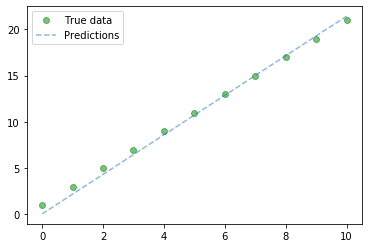

In [18]:
# Clear figure
plt.clf()

# Get predicitions
# We feed x data to our model
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predicitions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')

plt.show()

### Save Model

In [19]:
save_model = False
if save_model is True:
    # Save only parameters - alpha(coefficient) & beta(intercept)
    torch.save(model.state_dict(), 'awesome_model.pkl')

### Load Model

In [20]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

### GPU Code summary
GPU: 2 things must be on GPU
- model
- variables

In [21]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

#########################
### USE GPU FOR MODEL ###
#########################

# if we can compile code on gpu
if torch.cuda.is_available():
    model.cuda()

''' 
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTASNTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #########################
    ### USE GPU FOR MODEL ###
    #########################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
        
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # logging
    
    print('epoch{}, loss {}'.format(epoch, loss.data))
    


epoch1, loss 105.61937713623047
epoch2, loss 9.099535942077637
epoch3, loss 1.221309781074524
epoch4, loss 0.5733572840690613
epoch5, loss 0.5152159333229065
epoch6, loss 0.5052423477172852
epoch7, loss 0.4992563724517822
epoch8, loss 0.4936527609825134
epoch9, loss 0.4881381392478943
epoch10, loss 0.4826871156692505
epoch11, loss 0.47729673981666565
epoch12, loss 0.47196701169013977
epoch13, loss 0.46669644117355347
epoch14, loss 0.4614847004413605
epoch15, loss 0.45633161067962646
epoch16, loss 0.45123571157455444
epoch17, loss 0.44619685411453247
epoch18, loss 0.4412141740322113
epoch19, loss 0.4362873435020447
epoch20, loss 0.4314153790473938
epoch21, loss 0.4265977442264557
epoch22, loss 0.42183423042297363
epoch23, loss 0.4171236753463745
epoch24, loss 0.4124656319618225
epoch25, loss 0.407859742641449
epoch26, loss 0.40330514311790466
epoch27, loss 0.3988012373447418
epoch28, loss 0.39434814453125
epoch29, loss 0.38994452357292175
epoch30, loss 0.385590136051178
epoch31, loss 0.

### Summary
- Simple <b> linear regression basics </b>
    - $ y = \alpha x + \beta $
    - $ y = 2x + 1 $
- <b> Example </b> of simple linear regression
- <b> Aim </b> of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through MSE
        - Calculate gradients
        - Update parameters with <b> parameters = parameters - learning_rate*gradients
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $ y = 2x + 1 $
    - Built a linear regression <b> model </b> in <b> CPU </b> and <b> GPU </b>
        - Step 1: Create Model Class
        - Step 2: Instantiate Model Class
        - Step 3: Instantiate Loss Class
        - Step 4: Instantiate Optimizer Class
        - Step 5: Train Model
    - Important things to be on <b> GPU </b>
        - model
        - variables
    - How to bring to <b> GPU </b> ?
        - model_name.cuda()
        - variable_name.cuda()
        